# Visualization and Data Manipulation

In this lab you will be introduced to plots, mapping, and data manipulation techniques in python. The answers are already provided and you are encouraged to make small tweaks to the plots, maps, and figures. Please read all questions carefully to ensure you are doing the correct processes.

## Your Name: Nathan Sturgill


*Run the cell below to load some of the necessary modules.*

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# %matplotlib widget
%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 8]

plt.style.use("ggplot")

## 1. Introduction

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/">
  <img src="pew_population_projection.png" alt="Estimated and project annual world population from 1950 to 2100.  Estimates in 1950 start at 2 billion and grow to 6 billion in 2000.  Projects say the population in 2100 will be 10.9 billion people."/>
 </a>


In this section, we will examine some of the factors that influence population growth and how they are changing around the world. The `population.csv` file can also be found [online here](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv).

The first data frame contains the total population of each country over time. Run the cell below.


In [6]:
population = pd.read_csv("population.csv").rename(columns={"population_total": "population"})
population.head(10)

,geo,time,population
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000
5,afg,1805,3280000
6,afg,1806,3280000
7,afg,1807,3280000
8,afg,1808,3280000
9,afg,1809,3280000


The `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard.

## 2. Population Growth in the 20th Century

Let's investigate the population growth in the 20th Century.

**Question 2.1:** Produce a data frame `pop_20_century` with the total population (for all countries in `population.csv` together) for each year from 1901 to 2000.

*Hints:*
  - First filter the rows with the desired years.  (Either `query` or `loc` can be used.)
  - The method `groupby` should help to get the total population per year.
  - To avoid warnings from `groupby`, you might need to drop column(s) that we do not need.

In [7]:
pop_20_century = (
    population
    .drop(columns="geo")
    .query("1901 <= time <= 2000")
    .groupby("time").sum()
)

pop_20_century.style.format({"population": "{:,}"})

,population
time,
1901,"1,658,785,643"
1902,"1,672,564,382"
1903,"1,687,012,805"
1904,"1,701,647,404"
1905,"1,716,473,051"
1906,"1,731,494,784"
1907,"1,746,736,854"
1908,"1,762,200,207"
1909,"1,777,067,748"


**Question 2.2:** Give a *line plot* with the years from the 20th century in the $x$-axis and their corresponding populations in the $y$-axis.

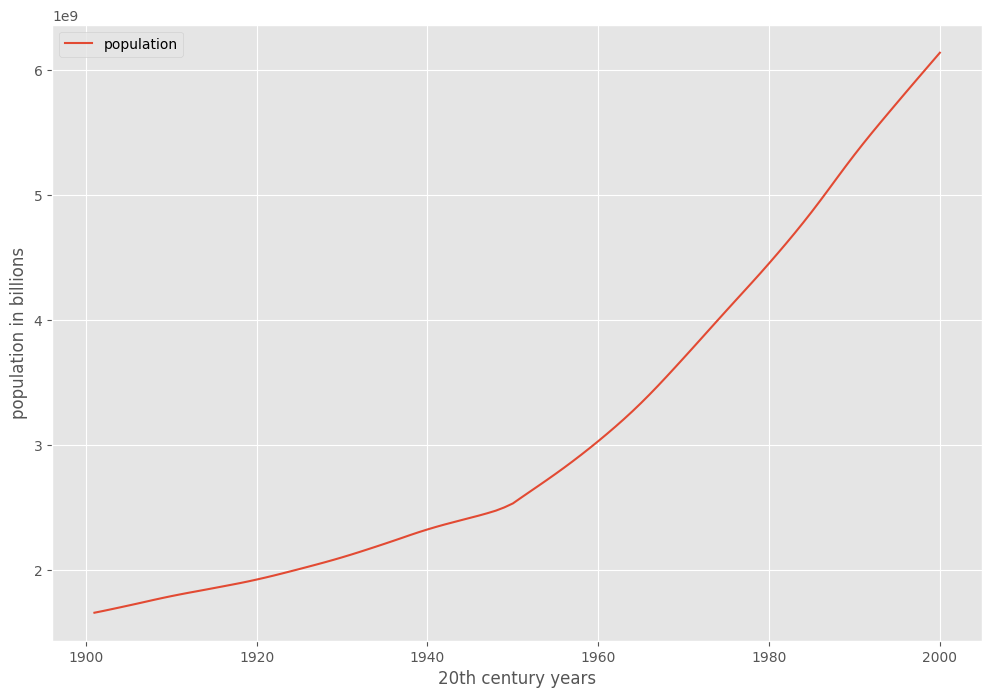

In [8]:
pop_20_century.plot()
plt.ylabel('population in billions')
plt.xlabel('20th century years')
plt.legend()
plt.show()

**Question 2.2.2:** Can you alter the above plot so that it shows the years in 10 year increments?

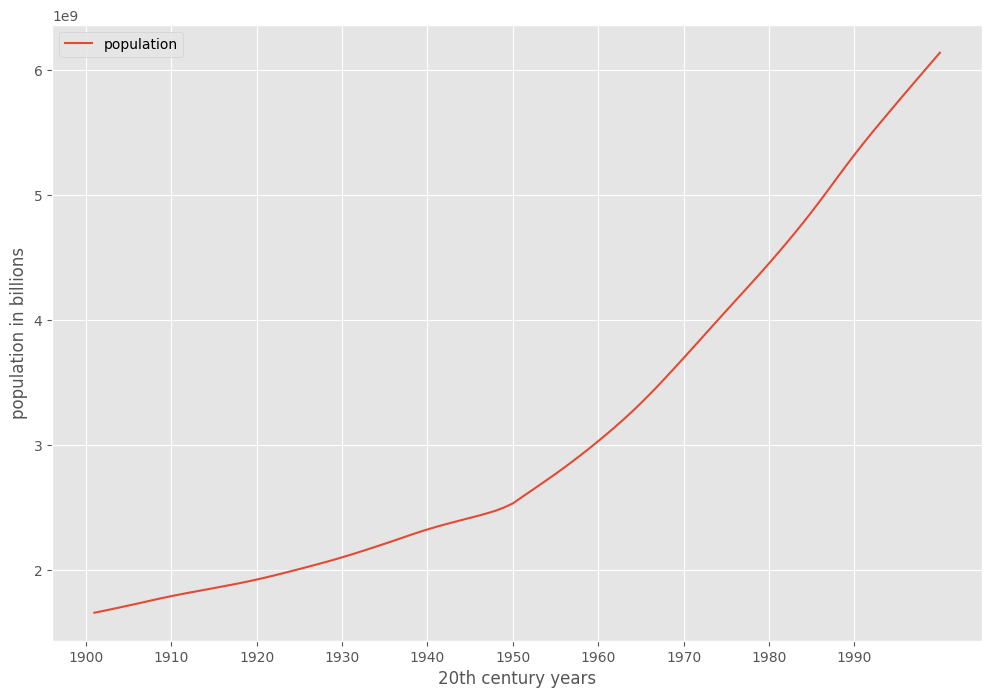

In [9]:
pop_20_century.plot()
plt.ylabel('population in billions')
plt.xlabel('20th century years')
plt.legend()

plt.xticks(range(1900, 2000, 10))

plt.show()

**Question 2.3:** We now investigate the population growth of the five largest countries in the Americas: Argentina (code `arg`), Brazil (code `bra`), Canada (code `can`), Mexico (code `mex`), and United States (code `usa`).  First, produce a data frame `americas_largest_5_pop` with the populations of only these five countries in the 20th century (i.e., from 1901 to 2000).

*Hint:* This just filtering.  The country codes are given.  Note if you variables in use `query`, their names must be preceded by `@`.  (You can also use `loc`.)

In [10]:
country_codes = ["arg", "bra", "can", "mex", "usa"]

americas_largest_5_pop = population.loc[
    (population["time"] >= 1901)
    & (population["time"] <= 2000)
    & (population["geo"].isin(country_codes))
]

americas_largest_5_pop.style.format({"population": "{:,}"})

,geo,time,population
1606,arg,1901,"4,859,874"
1607,arg,1902,"5,041,283"
1608,arg,1903,"5,234,002"
1609,arg,1904,"5,434,089"
1610,arg,1905,"5,641,825"
1611,arg,1906,"5,857,502"
1612,arg,1907,"6,081,424"
1613,arg,1908,"6,313,906"
1614,arg,1909,"6,538,902"
1615,arg,1910,"6,755,700"


In [11]:
country_codes = ['arg', 'bra', 'can', 'mex', 'usa']

americas_largest_5_pop = (
    population
    .query("geo in @country_codes")
    .query("1901 <= time <= 2000")
)

americas_largest_5_pop.head(10).style.format({"population": "{:,}"})

,geo,time,population
1606,arg,1901,"4,859,874"
1607,arg,1902,"5,041,283"
1608,arg,1903,"5,234,002"
1609,arg,1904,"5,434,089"
1610,arg,1905,"5,641,825"
1611,arg,1906,"5,857,502"
1612,arg,1907,"6,081,424"
1613,arg,1908,"6,313,906"
1614,arg,1909,"6,538,902"
1615,arg,1910,"6,755,700"


---

Here is a way to easily plot the populations of these countries in a single plot.  For that, we would like to have a column for each year, and a column for the corresponding population for *each* country.

We can use the `pivot_table` for that!  We pass the column label `time` as the new index (with the `index=` option) and we want the values of the column label `geo` as columns, and the values for each column is the content of `population`:

In [12]:
pop_by_country = americas_largest_5_pop.pivot_table(
    index="time", columns="geo", values="population"
)

pop_by_country.head(10).style.format("{:,}")

geo,arg,bra,can,mex,usa
time,,,,,
1901,"4,859,874","18,469,004","5,523,789","13,538,157","80,336,086"
1902,"5,041,283","18,874,521","5,657,400","13,680,660","81,949,920"
1903,"5,234,002","19,279,718","5,813,200","13,810,856","83,606,240"
1904,"5,434,089","19,693,613","5,973,290","13,942,289","85,296,008"
1905,"5,641,825","20,116,394","6,137,788","14,074,971","87,019,897"
1906,"5,857,502","20,548,251","6,306,814","14,208,916","88,778,597"
1907,"6,081,424","20,989,379","6,480,495","14,344,134","90,572,810"
1908,"6,313,906","21,439,977","6,658,958","14,480,638","92,403,252"
1909,"6,538,902","21,899,583","6,831,767","14,587,552","94,167,861"


Now, we can just use the `plot` method!

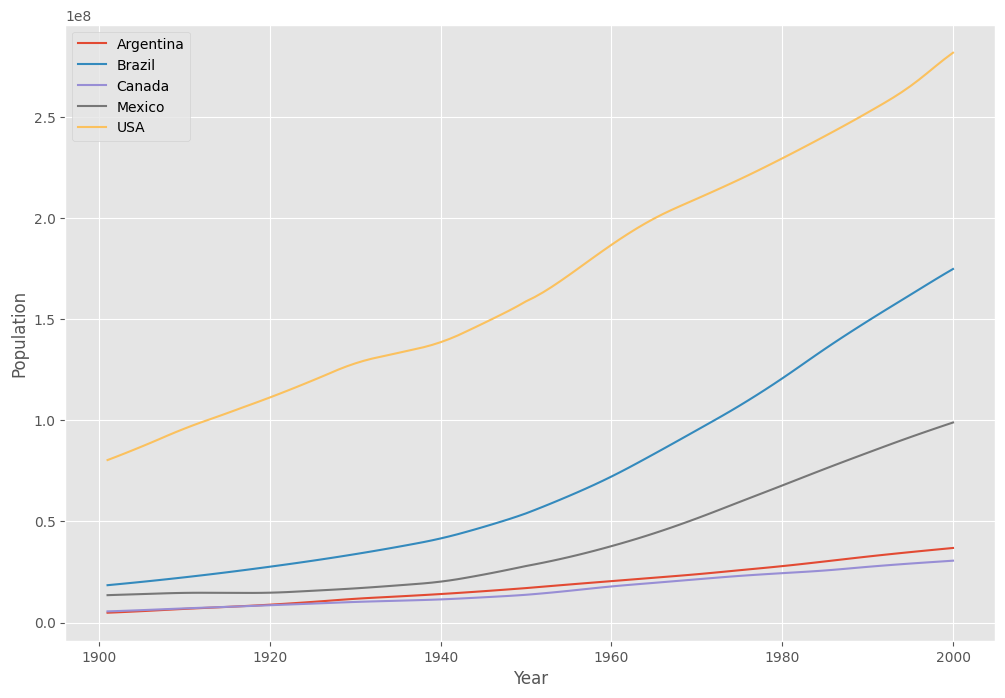

In [13]:
pop_by_country.plot(xlabel="Year", ylabel="Population")

# adjust labels from codes to names
plt.legend(["Argentina", "Brazil", "Canada", "Mexico", "USA"])

plt.show()

**Question 2.3.1:** Can you re-create the same graph above but add Russia and China to the graph.

In [14]:
country_codes = ['arg', 'bra', 'can', 'mex', 'usa', 'rus', 'chn']

different_country_pop = (
    population
    .query("geo in @country_codes")
    .query("1901 <= time <= 2000")
)

different_country_pop.style.format({"population": "{:,}"})

,geo,time,population
1606,arg,1901,"4,859,874"
1607,arg,1902,"5,041,283"
1608,arg,1903,"5,234,002"
1609,arg,1904,"5,434,089"
1610,arg,1905,"5,641,825"
1611,arg,1906,"5,857,502"
1612,arg,1907,"6,081,424"
1613,arg,1908,"6,313,906"
1614,arg,1909,"6,538,902"
1615,arg,1910,"6,755,700"


In [15]:
pop_by_country = different_country_pop.pivot_table(
    index="time", columns="geo", values="population"
)

pop_by_country.head(10).style.format("{:,}")

geo,arg,bra,can,chn,mex,rus,usa
time,,,,,,,
1901,"4,859,874","18,469,004","5,523,789","403,786,465","13,538,157","65,538,914","80,336,086"
1902,"5,041,283","18,874,521","5,657,400","406,042,669","13,680,660","66,136,556","81,949,920"
1903,"5,234,002","19,279,718","5,813,200","408,348,748","13,810,856","66,739,647","83,606,240"
1904,"5,434,089","19,693,613","5,973,290","410,667,922","13,942,289","67,348,237","85,296,008"
1905,"5,641,825","20,116,394","6,137,788","413,000,265","14,074,971","67,962,376","87,019,897"
1906,"5,857,502","20,548,251","6,306,814","415,345,852","14,208,916","68,582,114","88,778,597"
1907,"6,081,424","20,989,379","6,480,495","417,704,759","14,344,134","69,207,502","90,572,810"
1908,"6,313,906","21,439,977","6,658,958","420,077,060","14,480,638","69,838,592","92,403,252"
1909,"6,538,902","21,899,583","6,831,767","422,922,872","14,587,552","70,475,436","94,167,861"


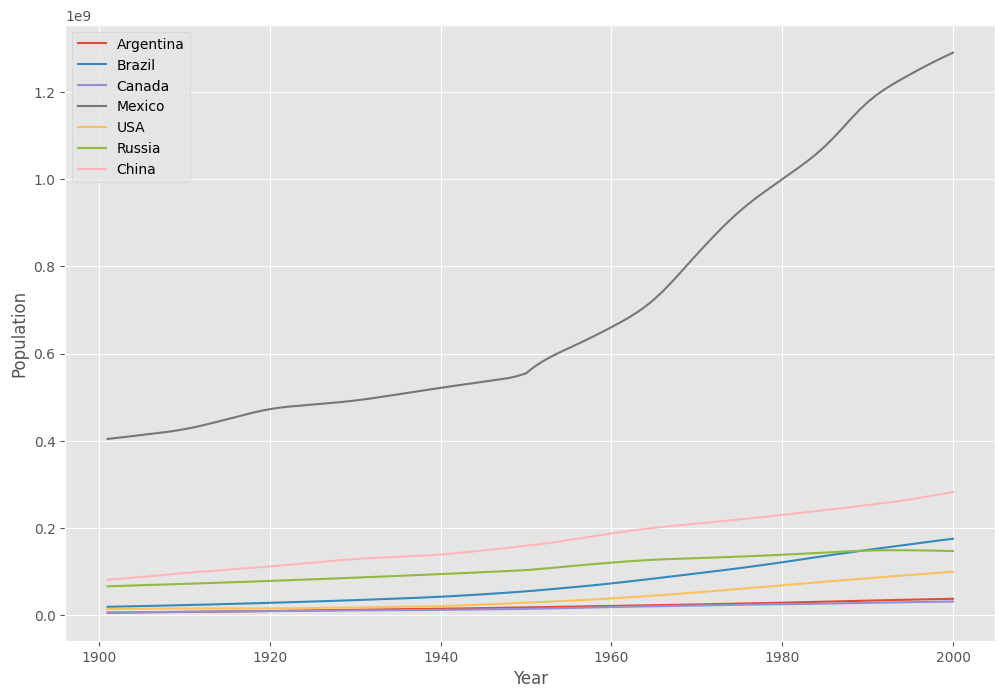

In [16]:
pop_by_country.plot(xlabel="Year", ylabel="Population")

plt.legend(["Argentina", "Brazil", "Canada", "Mexico", "USA","Russia","China"])

plt.show()

---

We now want to investigate the *percentage growth*, given by:

$$
100  \cdot \frac{\text{current value} - \text{previous value}}{\text{previous value}}
$$

For instance, if we have a series (like a column of a data frame) with values
```python
[1, 3, 5, 10]
```
its percentage growth is

$$
\left[ 100 \cdot \frac{3 -1}{1}, \; 100 \cdot \frac{5-3}{3}, \; 100 \cdot \frac{10 - 5}{5} \right] = [200, \; 66.666\ldots, \; 100].
$$


Fortunately, pandas already has a method for this, named `pct_change`.

To see it in an example, let's create a test data frame with the values above:


In [17]:
test_df = pd.DataFrame({
    "test_col": np.array([1, 3, 5, 10])
})

test_df

,test_col
0,1
1,3
2,5
3,10


Now, we apply the `pct_change` method:

In [18]:
test_df.pct_change()

,test_col
0,NaN
1,2.000000
2,0.666667
3,1.000000


Note that since there is no previous value to the first value, pandas gives an `NaN` ("not a number") for the first index.  Also note that it does not multiply by $100$ as we wanted in the original formula.

---

**Question 2.4:** Create a new data frame `perc_growth` that has a row for each year from **1902** (and not 1901!) to 2000, a column for each of the five largest country in the Americas, and the corresponding values are the percentage growth for the corresponding year and country.  

**Note:** *You should have no `NaN` in your data frame, and the values should be in **percentage**, not just the ratio.*

*Hint:* Use `pct_change` with `pop_by_country`, remove the first row, and multiply the columns by $100$.

In [19]:
perc_growth = pop_by_country.pct_change().iloc[1:] * 100

perc_growth.head(10).style.format("{:.2f}%")

geo,arg,bra,can,chn,mex,rus,usa
time,,,,,,,
1902,3.73%,2.20%,2.42%,0.56%,1.05%,0.91%,2.01%
1903,3.82%,2.15%,2.75%,0.57%,0.95%,0.91%,2.02%
1904,3.82%,2.15%,2.75%,0.57%,0.95%,0.91%,2.02%
1905,3.82%,2.15%,2.75%,0.57%,0.95%,0.91%,2.02%
1906,3.82%,2.15%,2.75%,0.57%,0.95%,0.91%,2.02%
1907,3.82%,2.15%,2.75%,0.57%,0.95%,0.91%,2.02%
1908,3.82%,2.15%,2.75%,0.57%,0.95%,0.91%,2.02%
1909,3.56%,2.14%,2.60%,0.68%,0.74%,0.91%,1.91%
1910,3.32%,2.14%,2.44%,0.79%,0.53%,0.91%,1.80%


**Question 2.5:** Plot the five line graphs (in a single plot) of the percentage growth of the five larges countries in the Americas.

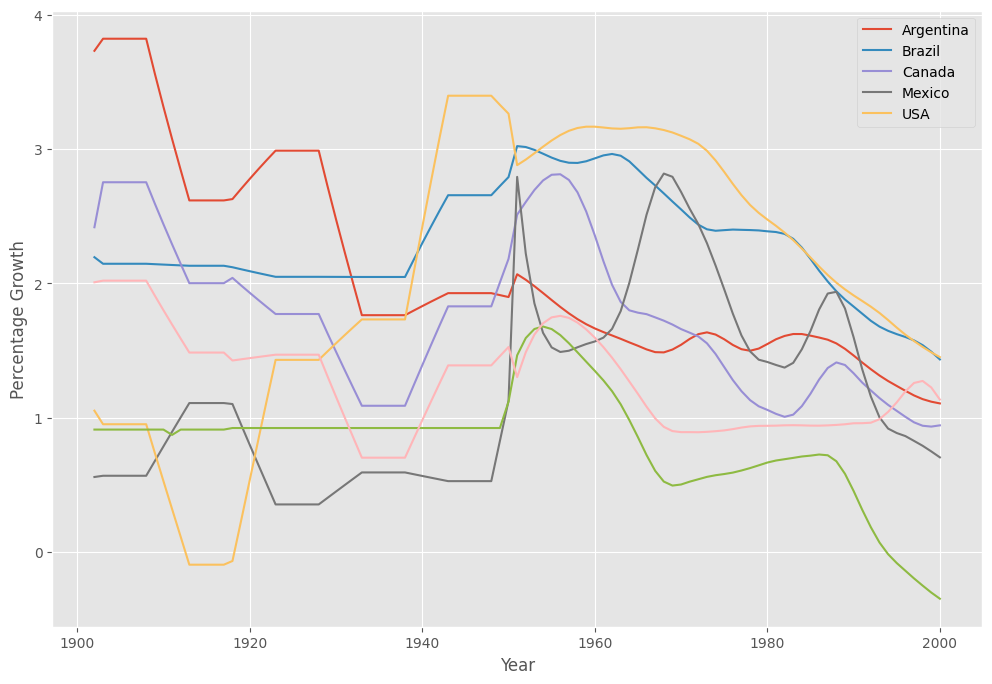

In [20]:
perc_growth.plot()

# some tweaks
plt.xlabel("Year")
plt.ylabel("Percentage Growth")
plt.legend(["Argentina", "Brazil", "Canada", "Mexico", "USA"])

plt.show()

**Question 2.6:** Create a (horizontal) bar chart with the populations of the largest five countries in the Americas in the year 2000, with largest population *at the bottom*.

*Hint:* Here is one way to do it:
  - Filter the `america_largest_5_pop` data frame for the year 2000.
  - Set the column `geo` as the index.
  - Drop the `time` column.
  - Sort the values as specified.
  - Plot the bar plot.


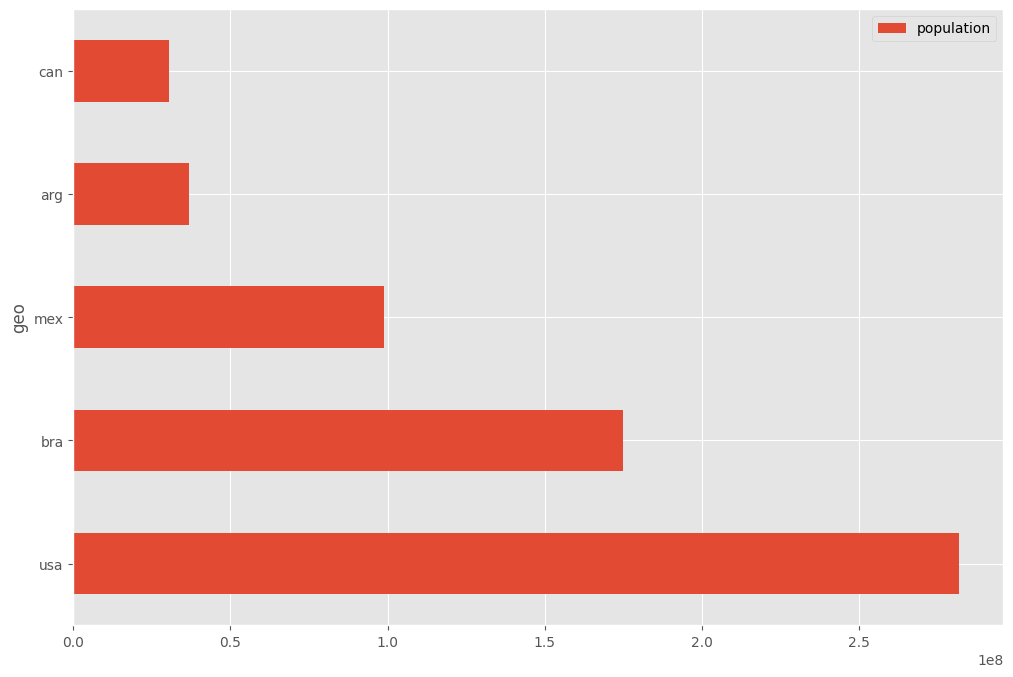

In [22]:
(
    americas_largest_5_pop
    .query("time == 2000")
    .set_index("geo")
    .drop(columns="time")
    .sort_values("population", ascending=False)
    .plot(kind="barh")
)

plt.show()

### Life Expectancy, Fertility, and Child Mortality

Let's look at some other information: life expectancy (in years), fertility rates (in number of children per woman), and child mortality rate (in deaths of 5 and younger children per 1000 children born).

Run the next cell to load three additional data frames of measurements about countries over time.

In [24]:
life_expectancy = pd.read_csv("life_expectancy.csv").rename(
    columns={"life_expectancy_years": "life_expectancy"}
)

child_mortality = pd.read_csv("child_mortality.csv").rename(
    columns={"child_mortality_0_5_year_olds_dying_per_1000_born": "child_mortality"}
)

fertility = pd.read_csv("fertility.csv").rename(
    columns={"children_per_woman_total_fertility": "fertility"}
)

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

 The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49.

In [25]:
life_expectancy

,geo,time,life_expectancy
0,afg,1800,28.21
1,afg,1801,28.20
2,afg,1802,28.19
3,afg,1803,28.18
4,afg,1804,28.17
...,...,...,...
43852,ssd,2012,56.00
43853,ssd,2013,56.00
43854,ssd,2014,56.10
43855,ssd,2015,56.10


In [26]:
fertility

,geo,time,fertility
0,afg,1800,7.00
1,afg,1801,7.00
2,afg,1802,7.00
3,afg,1803,7.00
4,afg,1804,7.00
...,...,...,...
43407,zwe,2011,3.64
43408,zwe,2012,3.56
43409,zwe,2013,3.49
43410,zwe,2014,3.41


In [27]:
child_mortality

,geo,time,child_mortality
0,afg,1800,468.60
1,afg,1801,468.60
2,afg,1802,468.60
3,afg,1803,468.60
4,afg,1804,468.60
...,...,...,...
40751,nld_curacao,2011,13.14
40752,nld_curacao,2012,12.58
40753,nld_curacao,2013,12.08
40754,nld_curacao,2014,11.67


---

**Question 3.1:** Merge all our date frames (`population`, `life_expectancy`, `fertility`, and `child_mortality`) into a single one named `full_data`.

*Hint:* Use `merge` multiple times.  Note that `merge` will use the common column names (`geo` and `time`) to merge, dropping any row with missing values, which is exactly what we want here.

In [29]:
full_data = (
    population
    .merge(life_expectancy)
    .merge(fertility)
    .merge(child_mortality)
)

full_data

,geo,time,population,life_expectancy,fertility,child_mortality
0,afg,1800,3280000,28.21,7.00,468.6
1,afg,1801,3280000,28.20,7.00,468.6
2,afg,1802,3280000,28.19,7.00,468.6
3,afg,1803,3280000,28.18,7.00,468.6
4,afg,1804,3280000,28.17,7.00,468.6
...,...,...,...,...,...,...
39559,zwe,2011,12894323,51.60,3.64,92.0
39560,zwe,2012,13115149,54.20,3.56,86.7
39561,zwe,2013,13350378,55.70,3.49,83.3
39562,zwe,2014,13586710,57.00,3.41,81.0


---

Now, let's load another data frame that contains the names for the countries for each code and the corresponding region.

In [31]:
all_countries = pd.read_csv(
    "countries.csv", usecols=["country", "name", "world_6region"]
)

all_countries

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,afg,Afghanistan,south_asia
2,akr_a_dhe,Akrotiri and Dhekelia,europe_central_asia
3,alb,Albania,europe_central_asia
4,dza,Algeria,middle_east_north_africa
...,...,...,...
270,yem,Yemen,middle_east_north_africa
271,yug,Yugoslavia,europe_central_asia
272,zmb,Zambia,sub_saharan_africa
273,zwe,Zimbabwe,sub_saharan_africa


We can see the regions (in `world_6region`):

In [32]:
all_countries["world_6region"].unique()

array(['europe_central_asia', 'south_asia', 'middle_east_north_africa',
       'east_asia_pacific', 'sub_saharan_africa', 'america', nan],
      dtype=object)

---

**Question 3.2:**  Create a new data frame called `full_country_data` that adds the country name and region to the `full_data` data frame.

*Hint:* To use merge, we have to have a column with the *same* label.

In [35]:
full_country_data = (
    full_data.merge(all_countries.rename(columns={"country": "geo"}))
)

full_country_data

,geo,time,population,life_expectancy,fertility,child_mortality,name,world_6region
0,afg,1800,3280000,28.21,7.00,468.6,Afghanistan,south_asia
1,afg,1801,3280000,28.20,7.00,468.6,Afghanistan,south_asia
2,afg,1802,3280000,28.19,7.00,468.6,Afghanistan,south_asia
3,afg,1803,3280000,28.18,7.00,468.6,Afghanistan,south_asia
4,afg,1804,3280000,28.17,7.00,468.6,Afghanistan,south_asia
...,...,...,...,...,...,...,...,...
39559,zwe,2011,12894323,51.60,3.64,92.0,Zimbabwe,sub_saharan_africa
39560,zwe,2012,13115149,54.20,3.56,86.7,Zimbabwe,sub_saharan_africa
39561,zwe,2013,13350378,55.70,3.49,83.3,Zimbabwe,sub_saharan_africa
39562,zwe,2014,13586710,57.00,3.41,81.0,Zimbabwe,sub_saharan_africa


**Question 3.3:** Reorder the columns of `full_country_data` to: `geo`, `name`, `world_6region`, `time`, `population`, `life_expectancy`, `fertility`, `child_mortality`.  Save the result into `full_country_data` itself.  (A list with the new order is given for your convenience.)


In [36]:
new_order = [
    "geo",
    "name",
    "world_6region",
    "time",
    "population",
    "life_expectancy",
    "fertility",
    "child_mortality",
]

full_country_data = full_country_data[new_order]

full_country_data

,geo,name,world_6region,time,population,life_expectancy,fertility,child_mortality
0,afg,Afghanistan,south_asia,1800,3280000,28.21,7.00,468.6
1,afg,Afghanistan,south_asia,1801,3280000,28.20,7.00,468.6
2,afg,Afghanistan,south_asia,1802,3280000,28.19,7.00,468.6
3,afg,Afghanistan,south_asia,1803,3280000,28.18,7.00,468.6
4,afg,Afghanistan,south_asia,1804,3280000,28.17,7.00,468.6
...,...,...,...,...,...,...,...,...
39559,zwe,Zimbabwe,sub_saharan_africa,2011,12894323,51.60,3.64,92.0
39560,zwe,Zimbabwe,sub_saharan_africa,2012,13115149,54.20,3.56,86.7
39561,zwe,Zimbabwe,sub_saharan_africa,2013,13350378,55.70,3.49,83.3
39562,zwe,Zimbabwe,sub_saharan_africa,2014,13586710,57.00,3.41,81.0


**Question 3.4:** The last year for which we have the statistics for most countries is 2015.  Since we are going to study these statistics for this year, create a new data frame `full_country_data_2015` with all the rows of `full_country_data` for the year 2015, and *remove the column with the year*.

In [37]:
full_country_data_2015 = full_country_data.query("time == 2015").drop(columns="time")
full_country_data_2015

,geo,name,world_6region,population,life_expectancy,fertility,child_mortality
215,afg,Afghanistan,south_asia,34413603,53.8,4.47,91.1
431,ago,Angola,sub_saharan_africa,27884380,59.6,5.65,156.9
647,alb,Albania,europe_central_asia,2890524,78.0,1.78,14.0
863,are,United Arab Emirates,middle_east_north_africa,9262896,75.4,1.77,6.8
1079,arg,Argentina,america,43075416,76.5,2.15,12.5
...,...,...,...,...,...,...,...
38699,wsm,Samoa,east_asia_pacific,193510,73.2,4.03,17.5
38915,yem,Yemen,middle_east_north_africa,26497881,66.0,3.83,47.5
39131,zaf,South Africa,sub_saharan_africa,55386369,61.3,2.34,42.1
39347,zmb,Zambia,sub_saharan_africa,15879370,56.7,5.59,67.8


**Question 3.5:**  Create two data frames, one containing the rows of `full_country_data_2015` of the ten countries with *highest* child mortality rate (for the year of 2015), and one for the ten countries with the lowest child mortality rate (for the same year).

In [38]:
highest_child_mortality = (
    full_country_data_2015
    .sort_values("child_mortality", ascending=False)
    .head(10)
)

highest_child_mortality

,geo,name,world_6region,population,life_expectancy,fertility,child_mortality
431,ago,Angola,sub_saharan_africa,27884380,59.6,5.65,156.9
34379,tcd,Chad,sub_saharan_africa,14110971,57.4,6.04,138.7
32219,som,Somalia,sub_saharan_africa,13797204,54.2,6.36,136.8
6047,caf,Central African Republic,sub_saharan_africa,4493171,49.6,4.20,130.5
31787,sle,Sierra Leone,sub_saharan_africa,7171909,57.1,4.55,120.4
23579,mli,Mali,sub_saharan_africa,17438772,60.2,6.81,114.7
26171,nga,Nigeria,sub_saharan_africa,181137454,64.6,5.89,108.8
2807,ben,Benin,sub_saharan_africa,10575962,62.3,4.69,99.5
7559,cod,"Congo, Dem. Rep.",sub_saharan_africa,76244532,60.8,5.72,98.3
21419,lso,Lesotho,sub_saharan_africa,2059011,47.1,2.94,97.1


In [40]:
lowest_child_mortality = (
    full_country_data_2015
    .sort_values("child_mortality")
    .head(10)
)

lowest_child_mortality

,geo,name,world_6region,population,life_expectancy,fertility,child_mortality
21851,lux,Luxembourg,europe_central_asia,566741,82.20,1.69,1.90
17315,isl,Iceland,europe_central_asia,330237,83.30,2.06,2.00
11879,fin,Finland,europe_central_asia,5481128,80.90,1.86,2.30
15155,hkg,"Hong Kong, China",east_asia_pacific,7185992,83.73,1.17,2.42
26819,nor,Norway,europe_central_asia,5199827,82.00,1.93,2.50
33299,svn,Slovenia,europe_central_asia,2071199,80.90,1.53,2.70
31355,sgp,Singapore,east_asia_pacific,5592143,82.00,1.30,2.70
18395,jpn,Japan,east_asia_pacific,127985139,83.20,1.45,2.70
33515,swe,Sweden,europe_central_asia,9764949,82.10,1.93,3.00
11447,est,Estonia,europe_central_asia,1315330,77.80,1.62,3.00


**Question 3.6:** Plot two (horizontal) bar plots showing the name and child mortality for the top and bottom ten countries with respect to child mortality in the year 2015.

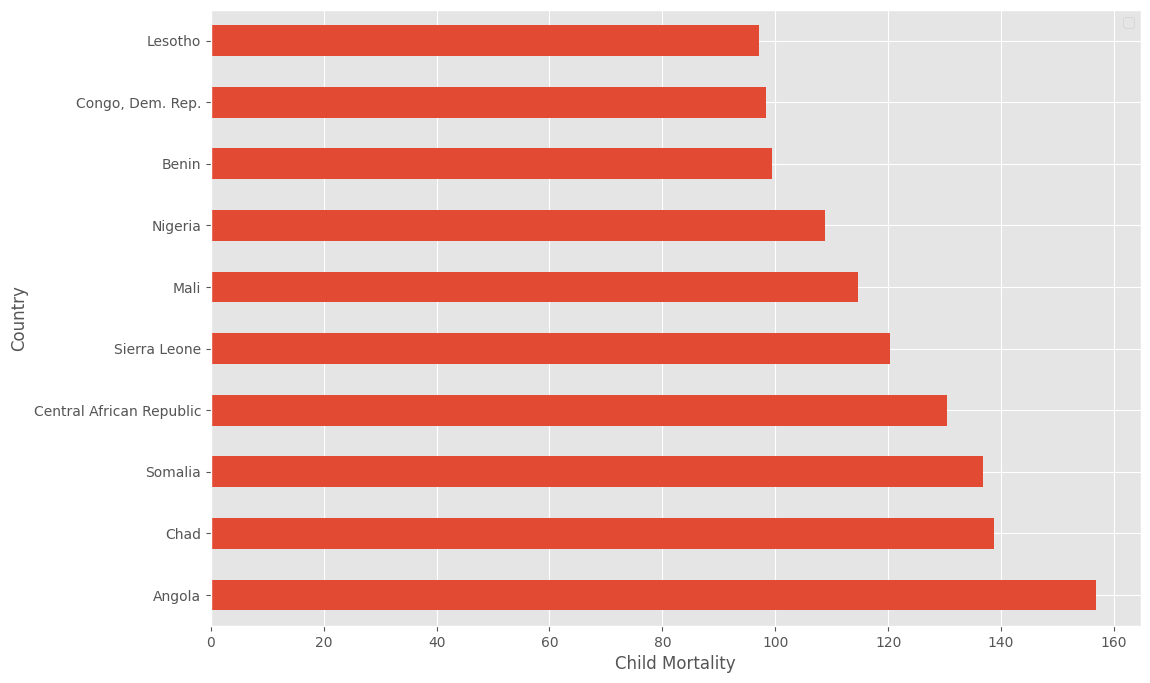

In [41]:
# highest child mortality
(
    highest_child_mortality
    .plot(
        "name",
        "child_mortality",
        kind="barh"
    )
)

# some tweaks
plt.ylabel("Country")
plt.xlabel("Child Mortality")
plt.legend("")

plt.show()

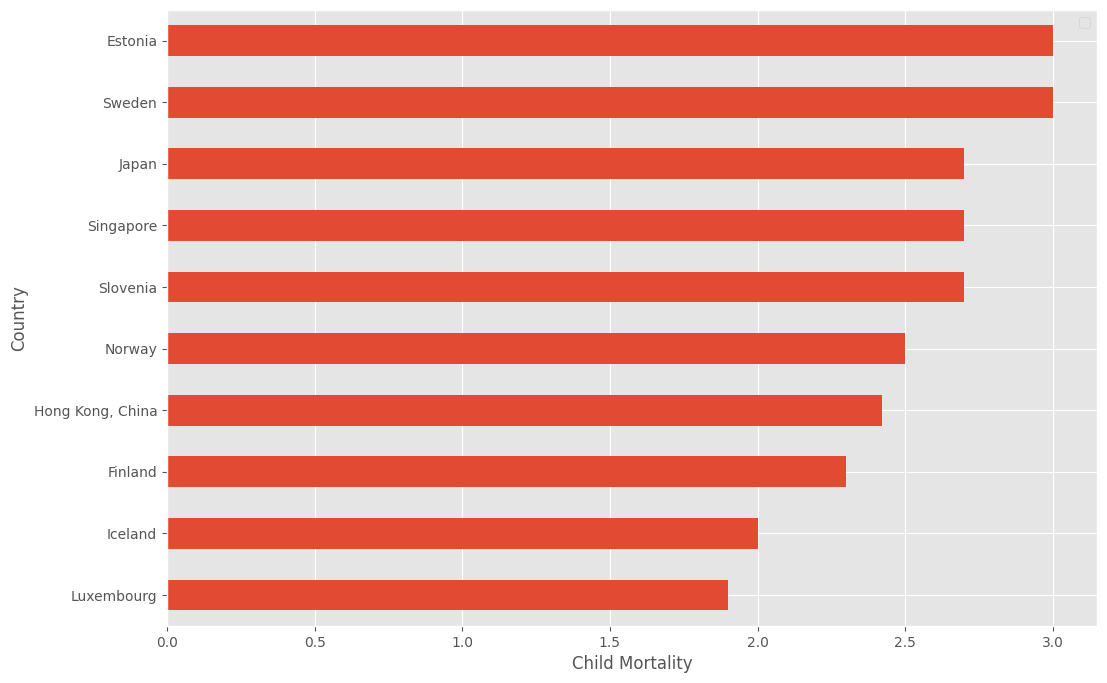

In [42]:
# lowest child mortality
(
    lowest_child_mortality.plot(
        "name",
        "child_mortality",
        kind="barh"
    )
)

# some tweaks
plt.xlabel("Child Mortality")
plt.ylabel("Country")
plt.legend("")

plt.show()

**Question 3.7.:**  Make a *single* (horizontal) bar graph, showing the fertility, child mortality, and life expectancy **in decades** of the five largest economies for the year 2015.  A list with the codes for the countries has been provided below.

In [43]:
full_country_data_2015["life_expectancy"].div(10)

215      5.38
431      5.96
647      7.80
863      7.54
1079     7.65
         ... 
38699    7.32
38915    6.60
39131    6.13
39347    5.67
39563    5.93
Name: life_expectancy, Length: 184, dtype: float64

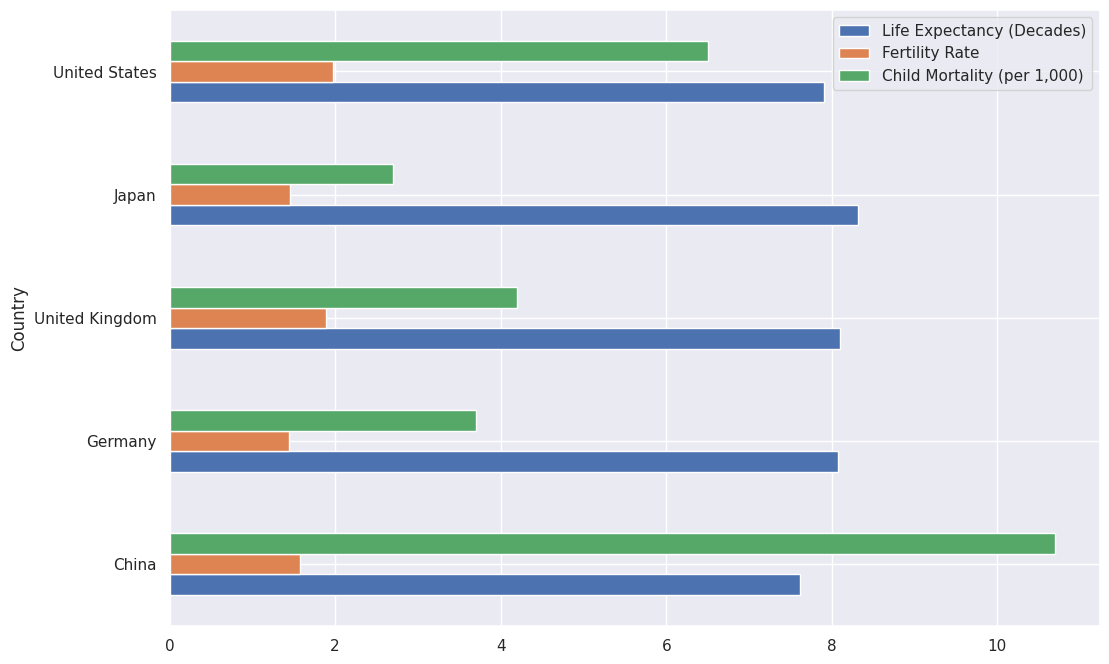

In [84]:
largest_economies = ["usa", "chn", "jpn", "deu", "gbr"]

(
    full_country_data_2015
    .query("geo in @largest_economies")
    .assign(life_expectancy=full_country_data_2015["life_expectancy"] / 10)
    .plot(
        x="name",
        y=[
            "life_expectancy",
            "fertility",
            "child_mortality",
        ],
        kind="barh",
    )
)

# some tweaks
plt.ylabel("Country")
plt.legend(["Life Expectancy (Decades)", "Fertility Rate", "Child Mortality (per 1,000)"])

plt.show()

**Question 3.7.2:** Please re-create the above graph but use the following countries: Brazil, Argentina, Mexico, Spain, and Peru.

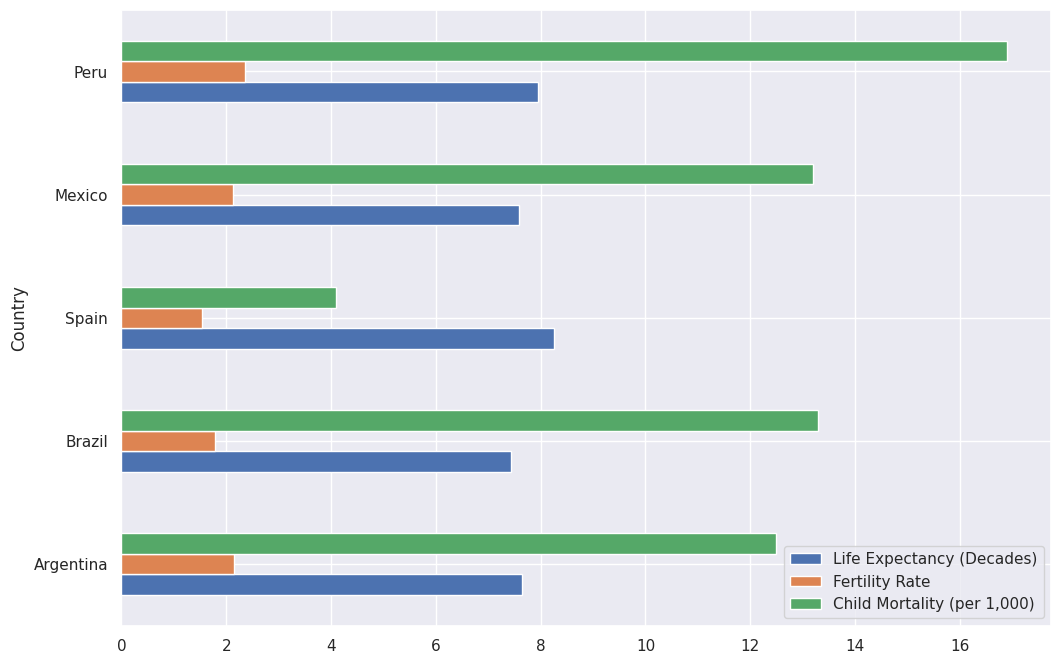

In [87]:
largest_economies = ["bra", "arg", "mex", "esp", "per"]

(
    full_country_data_2015
    .query("geo in @largest_economies")
    .assign(life_expectancy=full_country_data_2015["life_expectancy"] / 10)
    .plot(
        x="name",
        y=[
            "life_expectancy",
            "fertility",
            "child_mortality",
        ],
        kind="barh",
    )
)

# some tweaks
plt.ylabel("Country")
plt.legend(["Life Expectancy (Decades)", "Fertility Rate", "Child Mortality (per 1,000)"])

plt.show()

**Question 3.8:** Draw horizontal bar graphs for the *average* life expectancy *again in decades*, fertility rate, and child mortality for each of the six regions in `world_6region`.

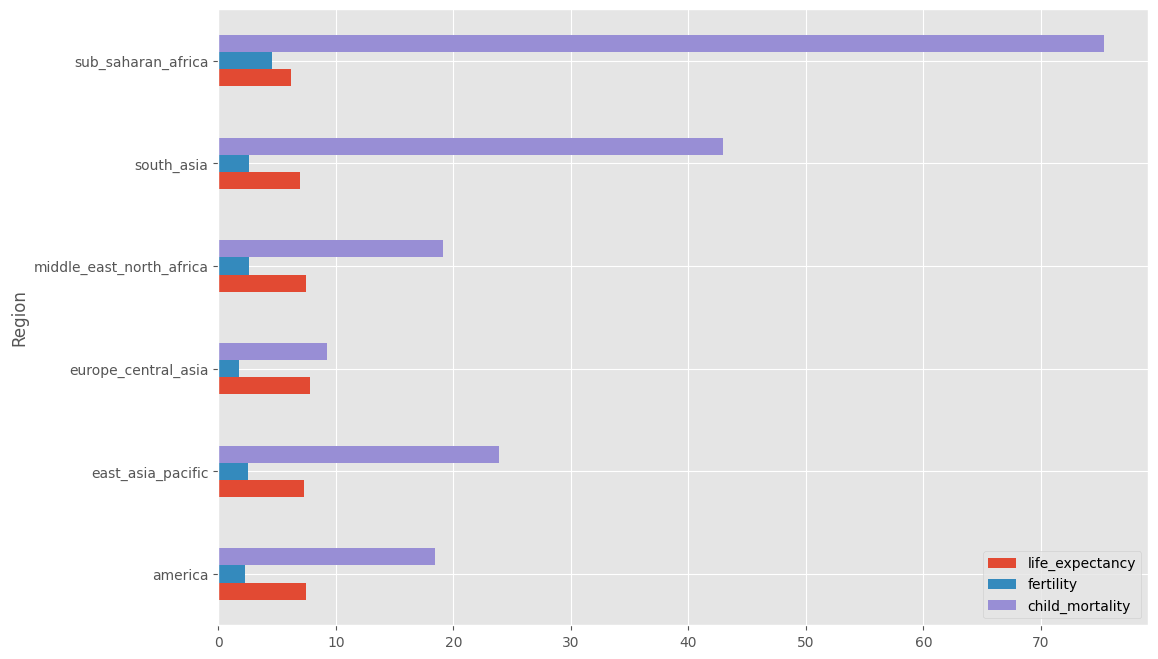

In [47]:
(
    full_country_data_2015.assign(
        life_expectancy=full_country_data_2015["life_expectancy"] / 10
    )
    .groupby("world_6region")[["life_expectancy", "fertility", "child_mortality"]]
    .mean()
    .plot(kind="barh")
)

# some tweaks
plt.ylabel("Region")

plt.show()

## 4. Correlations

Two pieces of data are *correlated* if a change in one of them implies a change in the other.  They are *positively correlated* if an increase in one implies an increase in the other, and they are *negatively correlated* if an increase in one implies a *decrease* in the other.

We will study correlation more carefully in [Chapter 15](https://inferentialthinking.com/chapters/15/Prediction.html), but the best method to visualize correlation is with *scatter plots*.

**Question 4.1:**  Let's examine if fertility and child mortality are correlated.  Draw a scatter for all the countries in `full_country_data_2015` with the $x$-axis having the fertility rate and the $y$-axis the child mortality rate (of the year 2015).

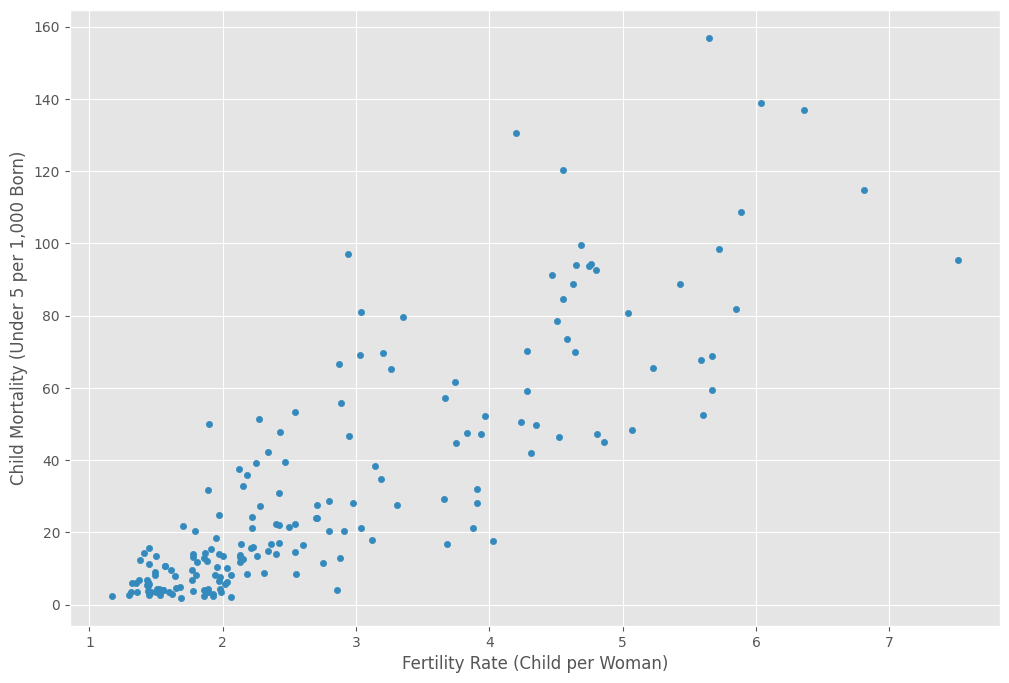

In [48]:
(
    full_country_data_2015
    .plot("fertility", "child_mortality", kind="scatter")
)

# some tweaks
plt.xlabel("Fertility Rate (Child per Woman)")
plt.ylabel("Child Mortality (Under 5 per 1,000 Born)")

plt.show()

**Question 4.2:**  Repeat the problem above, now with life expectancy (for the year 2015) in the $y$-axis.

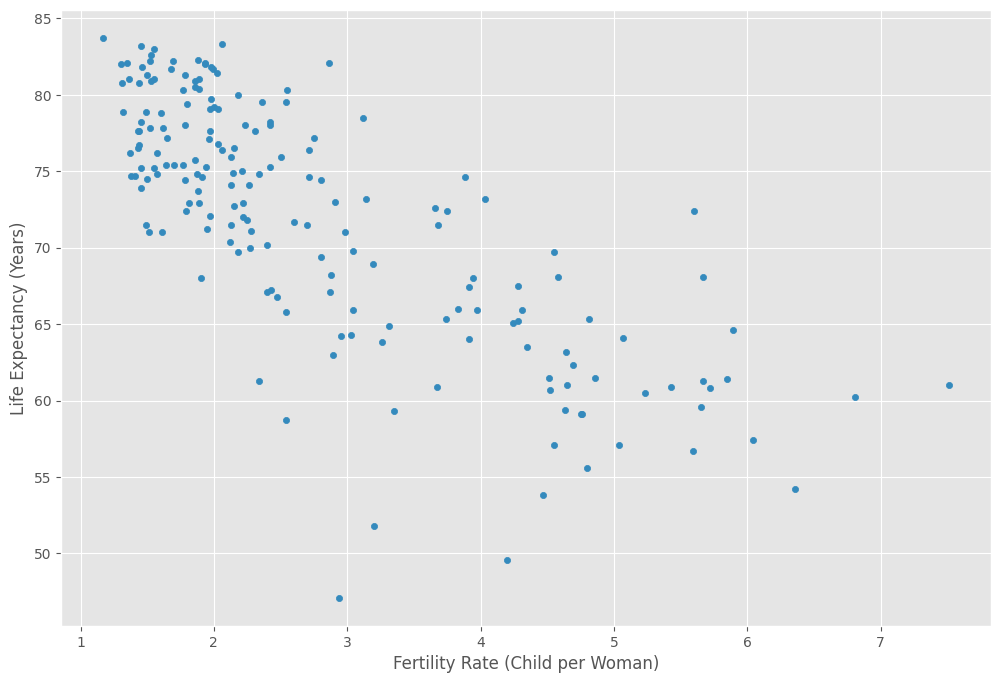

In [54]:
(
    full_country_data_2015
    .plot("fertility", "life_expectancy", kind="scatter")
)

# some tweaks
plt.xlabel("Fertility Rate (Child per Woman)")
plt.ylabel("Life Expectancy (Years)")

plt.show()

**Question 4.3:** Now draw a scatter plot of the population size (on the $x$-axis) and life expectancy (on the $y$-axis) for the year 2015 for all countries in `full_country_data_2015`.

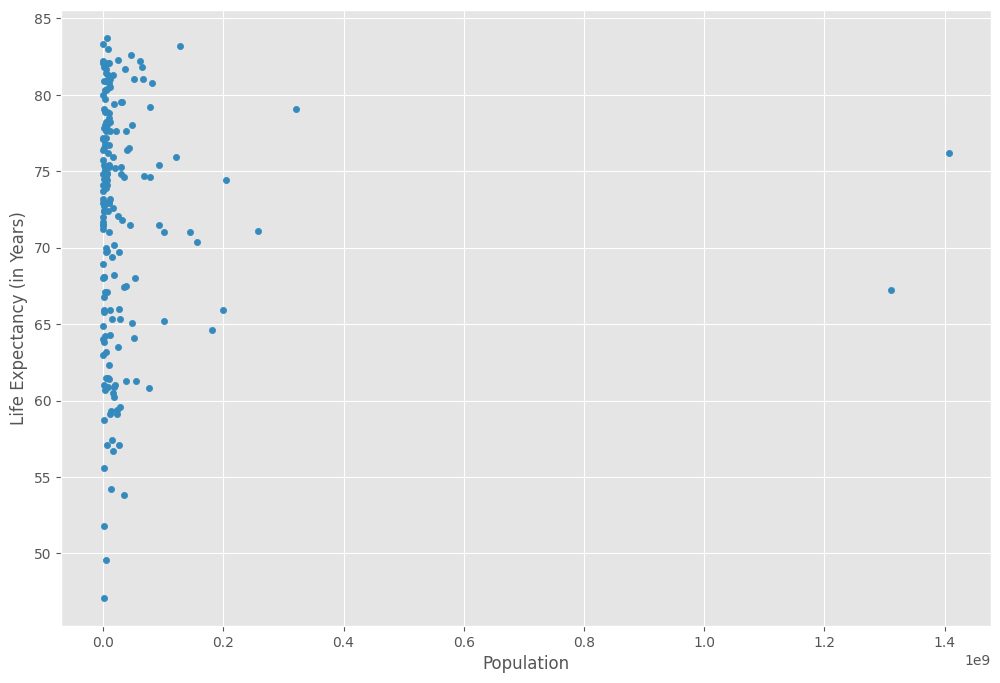

In [55]:
(
    full_country_data_2015
    .plot("population", "life_expectancy", kind="scatter")
)

# some tweaks
plt.xlabel("Population")
plt.ylabel("Life Expectancy (in Years)")

plt.show()

**Question 4.4:** The previous scatter plot should show a few outliers that makes harder to see if there is a correlation.  Repeat the same scatter plot, but *removing the twenty countries with largest population*.

Change the color of the points to red.

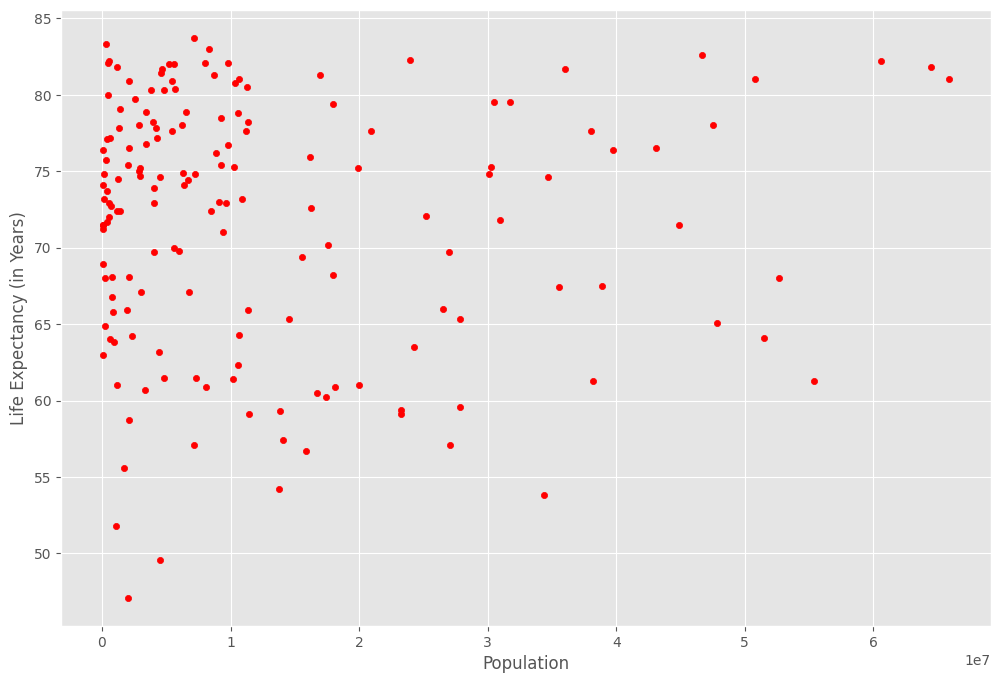

In [58]:
(
    full_country_data_2015
    .sort_values("population")
    .iloc[:-20]
    .plot("population", "life_expectancy", kind="scatter", color="red")
)

# some tweaks
plt.xlabel("Population")
plt.ylabel("Life Expectancy (in Years)")

plt.show()

## 5. Distributions

Histograms are often used to visualize distribution of data over intervals.

We can find the range of the population in the year 2015:

In [61]:
min_pop = full_country_data_2015["population"].min()
max_pop = full_country_data_2015["population"].max()

print(f"The population of countries in 2015 varies from {min_pop:,} to {max_pop:,}.")

The population of countries in 2015 varies from 93,571 to 1,406,847,868.


We can now see how the populations are distributed withing that range.

**Question 5.1:** Plot a *density* histogram, with twenty bins, for the populations of the countries in `full_country_data_2015` in the year 2015.

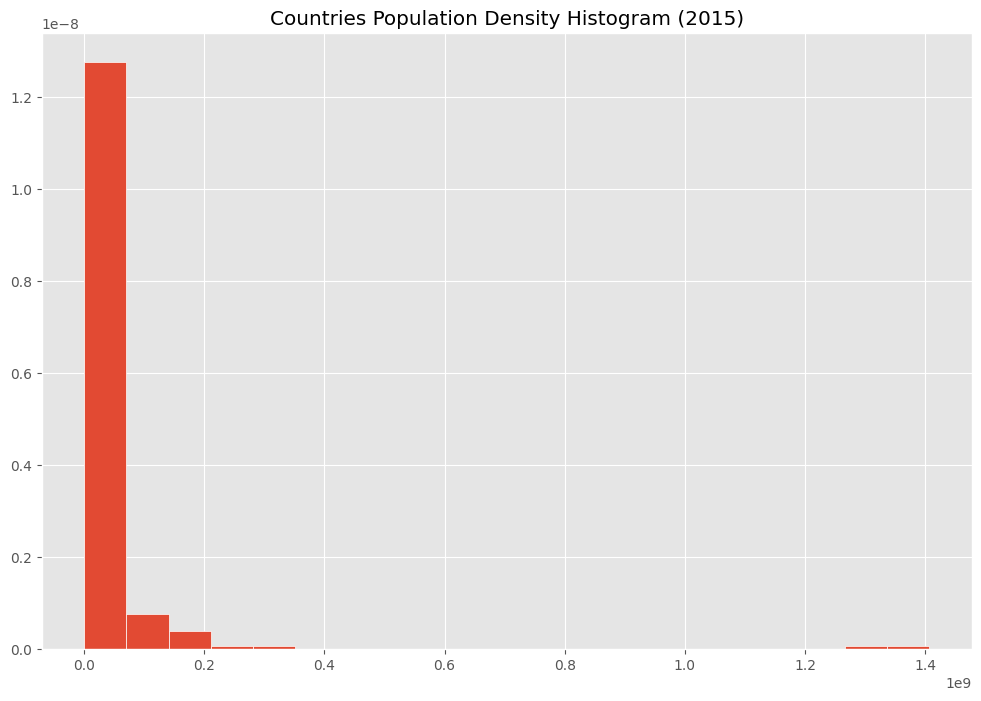

In [62]:
full_country_data_2015.hist("population", density=True, bins=20, ec="white")

# set title
plt.title("Countries Population Density Histogram (2015)")

plt.show()

**Question 5.2:** Again, having some outliers (with population) makes it harder to visualize the distribution of the data.  So, use instead as bins 20 of the same size, from $1{,}000{,}000$ to $250{,}000{,}000$.

*Hint:* The function [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) can be helpful in producing the desired bins.  `np.linspace(a, b, n)` produces `n` equally spaced numbers, starting at `a` and ending at `b`.  (Note that this would produced `n - 1` bins, not `n`!)

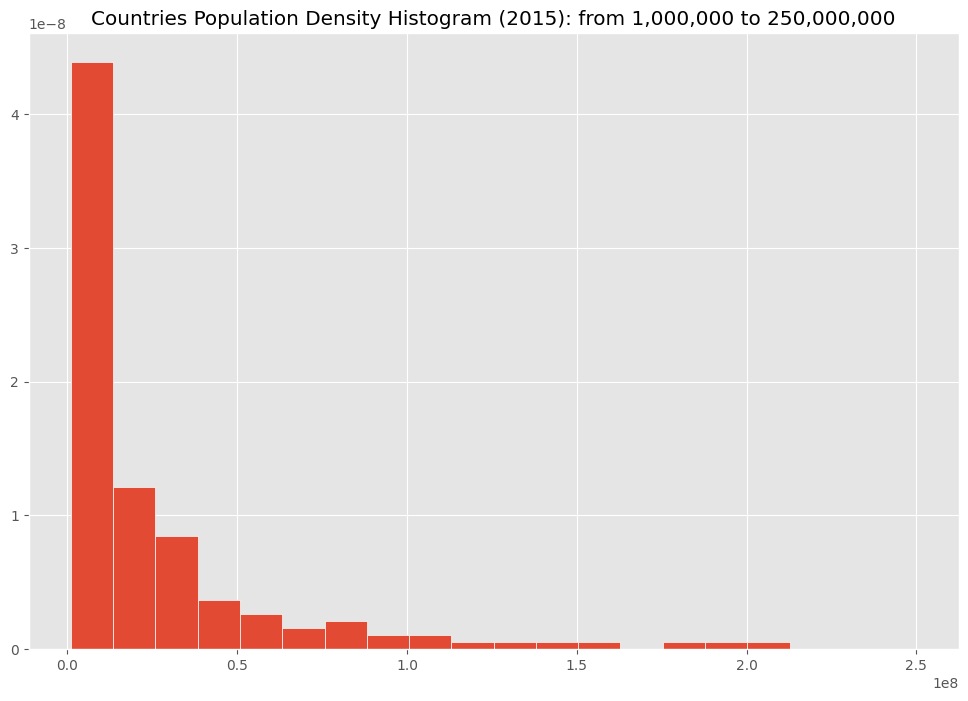

In [64]:
full_country_data_2015.hist("population", density=True, ec="white", bins=np.linspace(1e6, 25e7, 21))

# set title
plt.title("Countries Population Density Histogram (2015): from 1,000,000 to 250,000,000")

plt.show()

**Question 5.3:** Similarly, produce the density histograms for the child mortality and fertility for the year 2015, both with 20 bins of the equal size (from lowest to highest values).

Also, change the colors of this plot from red to blue.

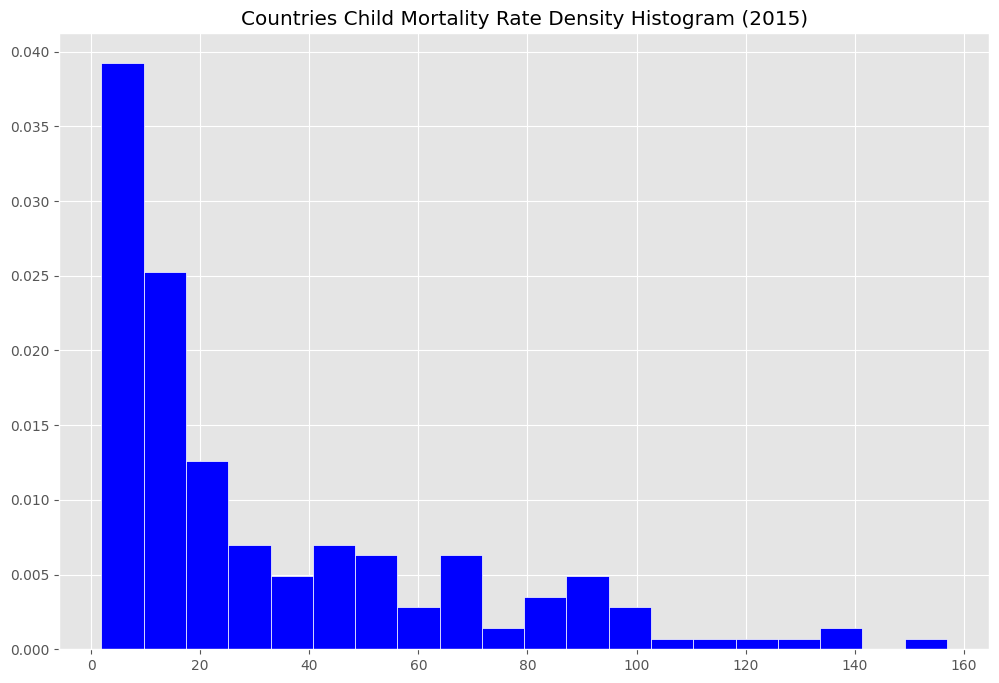

In [66]:
# child mortality
full_country_data_2015.hist("child_mortality", density=True, ec="white", bins=20, color="blue")

# set title
plt.title("Countries Child Mortality Rate Density Histogram (2015)")

plt.show()

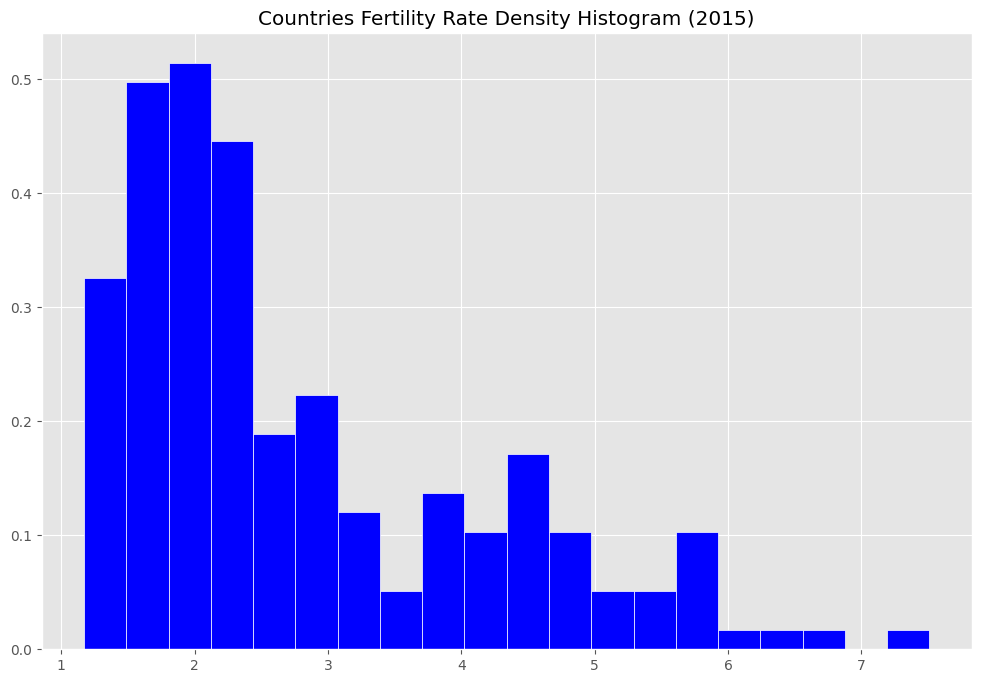

In [67]:
# fertility
full_country_data_2015.hist("fertility", density=True, ec="white", bins=20, color="blue")

# set title
plt.title("Countries Fertility Rate Density Histogram (2015)")

plt.show()

## 6. Seaborn
Seaborn is a plotting package similar to Matplotlib but it has the ability to make "publication quality" plots.


To use seaborn, you must use the function: sns.set_theme()

What that will do is ensure that every plot you produce has seaborn's template on it. However, Seaborn will continue to push its aesthetic on your plots unless you cancel it. To do that, use the function:

matplotlib.rc_file_defaults()

^This function will reset all plots to default matplotlib based plots.

Let's check out some Seaborn plots!!

<Axes: xlabel='time'>

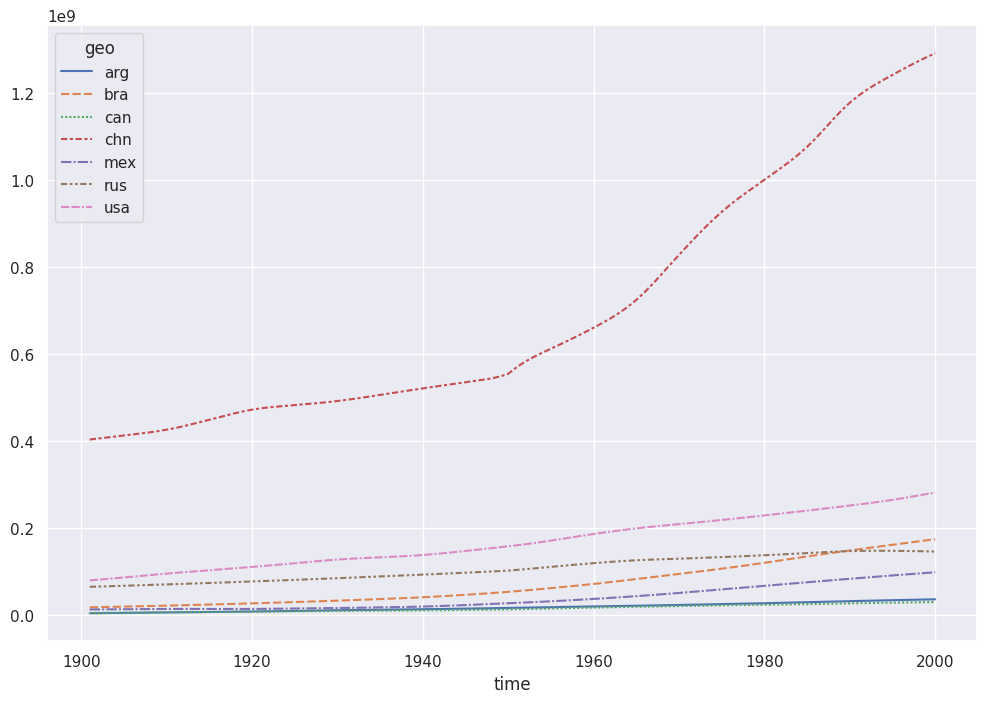

In [70]:
sns.set_theme()

#Line Plot

sns.lineplot(data=pop_by_country)


**Box plots**
Box plots are great for showing the descriptive statistics of an event.

<Axes: xlabel='geo'>

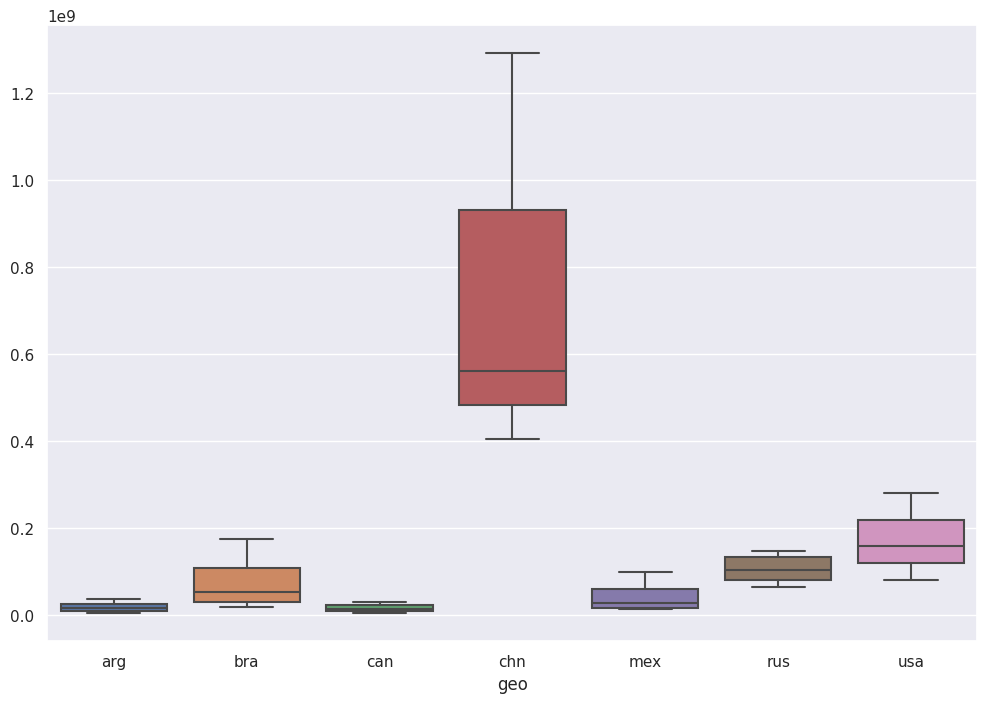

In [72]:
sns.boxplot(data=pop_by_country)

**GREAT**

You did it! Now let's figure out how we can customize the x and y axis labels before we proceed to other plots. Unfortunately, seaborn prefers long type customizations, which means you can't just express the information you want written like with Matplotlib. Instead, you need to save the plot as a variable and then feed the x and y axis label informaiton.

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Population')]

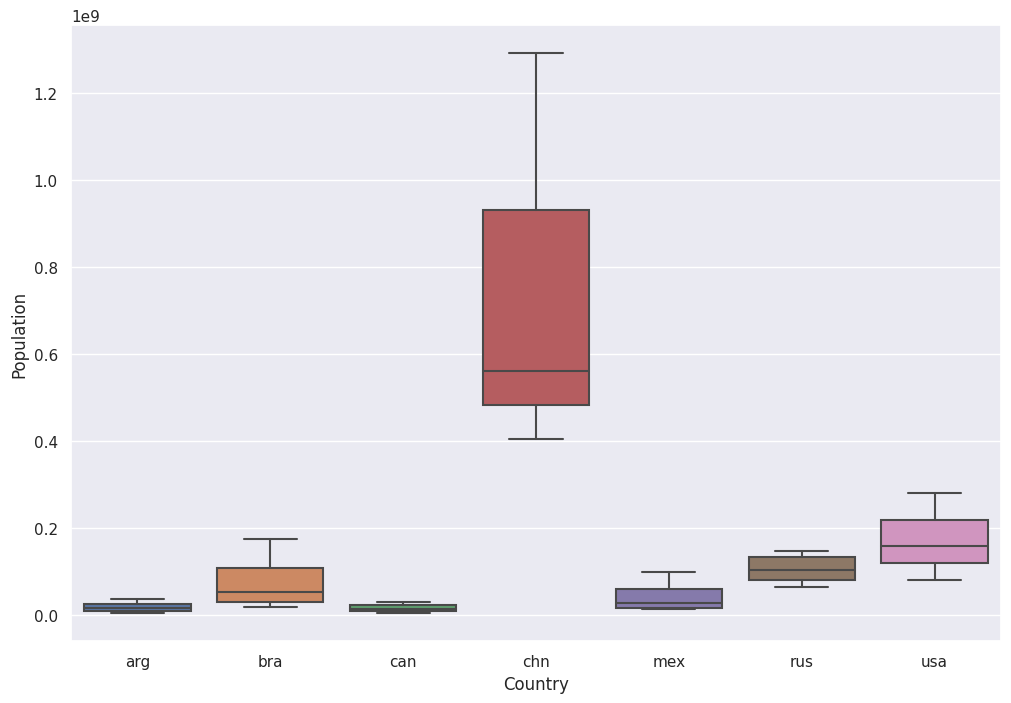

In [74]:
populationBoxPlot = sns.boxplot(data=pop_by_country)

populationBoxPlot.set(xlabel='Country', ylabel='Population')

**Bar Charts**

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Population')]

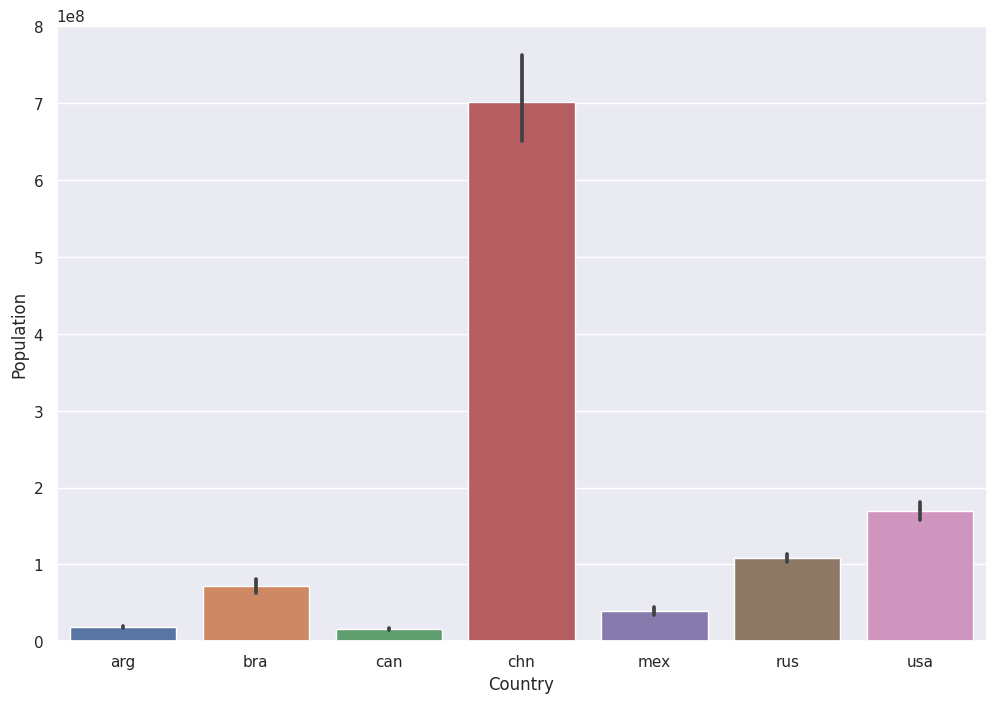

In [75]:
populationBarPlot = sns.barplot(data=pop_by_country)

populationBarPlot.set(xlabel='Country', ylabel='Population')

**Scatterplots**

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Population')]

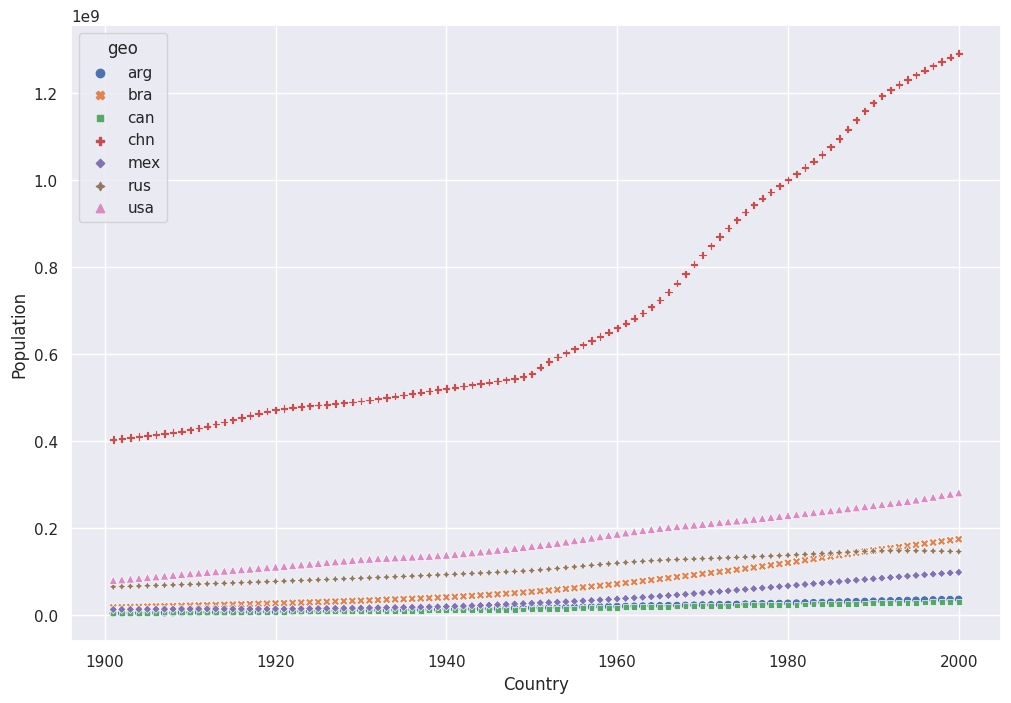

In [77]:
populationScatterPlot = sns.scatterplot(data=pop_by_country)

populationScatterPlot.set(xlabel='Country', ylabel='Population')

**Histograms**

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Population')]

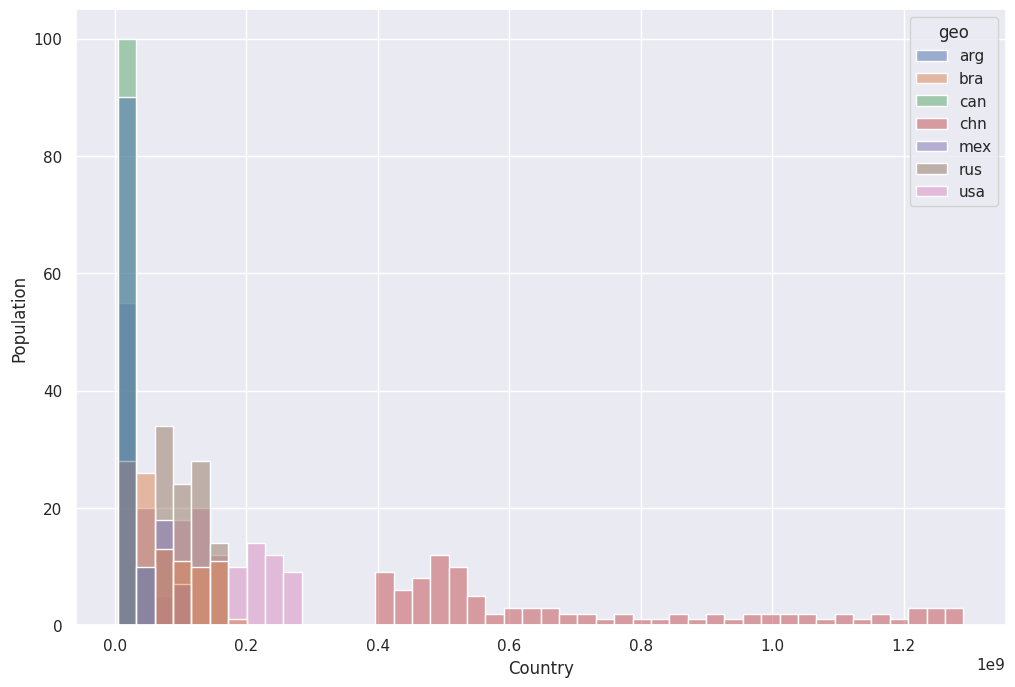

In [82]:
populationHistogram = sns.histplot(data=pop_by_country)

populationHistogram.set(xlabel='Country', ylabel='Population')

**Question 6.0:**

Can you describe what is happening with the above histogram? Why does it look so funny? How do you think you could correct this.

In the above histogram it is showing the population totals of each country. The histogram format is being used here to plot the frequency of each population total for all countries. The reason that this looks so funny is that histograms are typically used for plotting the frequency or count of points in different bins. Histograms are also typically associated with the distribution of a single continuous variable. I would most likely correct this by changing the histogram to a line plot or a scatter plot using the same data. If I had to fix the histogram without changing the statistical graph type I would most likely make the intervals of the ticks on the x and y axis smaller to be able to tell the differences in country population more closely.

**Question 6.1:**

Re-create the plots from 3.7 and 3.8 using Seaborn.


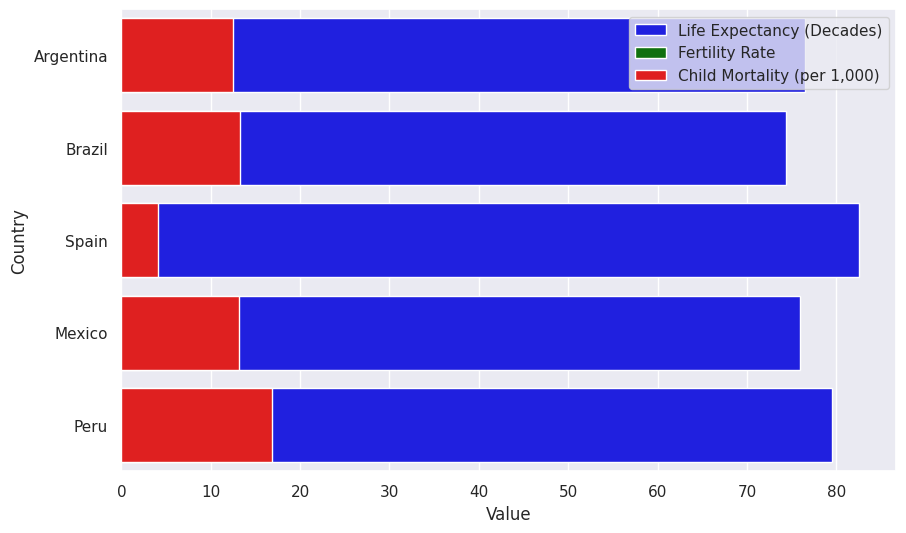

In [92]:
#3.7
largest_economies = ["bra", "arg", "mex", "esp", "per"]

filtered_data = full_country_data_2015.query("geo in @largest_economies")

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, y="name", x="life_expectancy", color="blue", label="Life Expectancy (Decades)")
sns.barplot(data=filtered_data, y="name", x="fertility", color="green", label="Fertility Rate")
sns.barplot(data=filtered_data, y="name", x="child_mortality", color="red", label="Child Mortality (per 1,000)")

plt.xlabel("Value")
plt.ylabel("Country")
plt.legend()

plt.show()

This was my first attempt and obviously it is not correct so I tried what is below instead.

<Axes: xlabel='value', ylabel='name'>

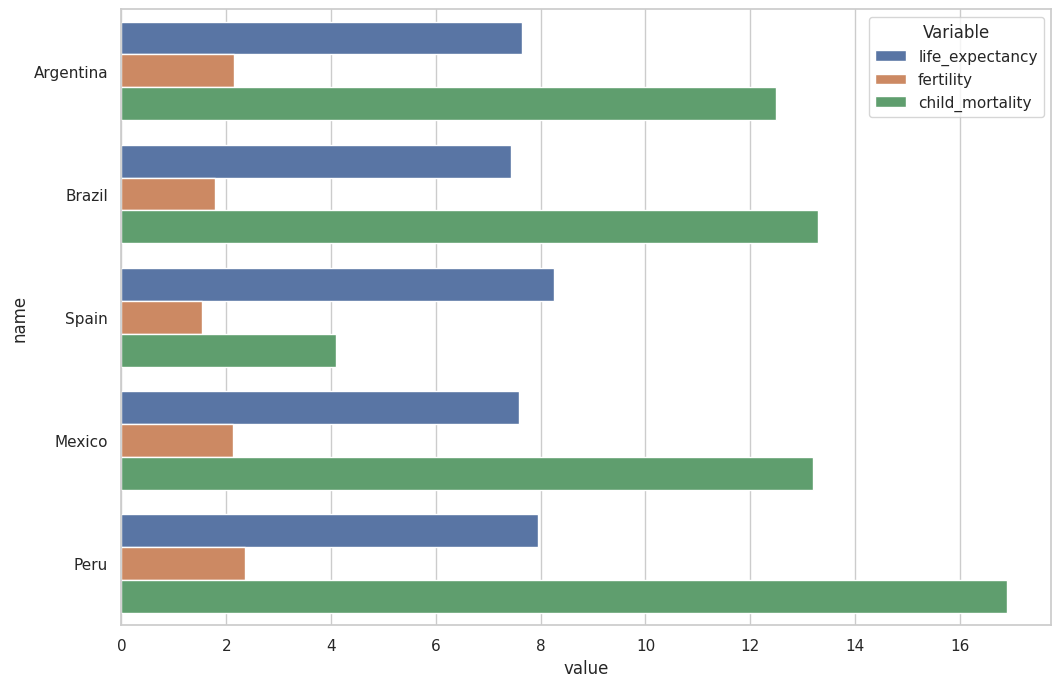

In [104]:
filtered_data = (
    full_country_data_2015
    .query("geo in @largest_economies")
    .assign(life_expectancy=full_country_data_2015["life_expectancy"] / 10)
    .melt(
    id_vars = ["name"],
    value_vars = ["life_expectancy", "fertility", "child_mortality" ],
    var_name="Variable")
)


sns.barplot(x="value", y="name", hue= 'Variable', data=filtered_data)

3.8 regraph using seaborn below

In [112]:
region_dataset =  full_country_data_2015.assign(life_expectancy=full_country_data_2015["life_expectancy"] / 10).groupby("world_6region")[["life_expectancy", "fertility", "child_mortality"]].mean()
region_dataset = region_dataset.reset_index()

In [113]:
region_dataset = region_dataset.melt(id_vars = ['world_6region'],value_vars = ["life_expectancy", "fertility", "child_mortality" ],var_name="Variable")

<Axes: xlabel='value', ylabel='world_6region'>

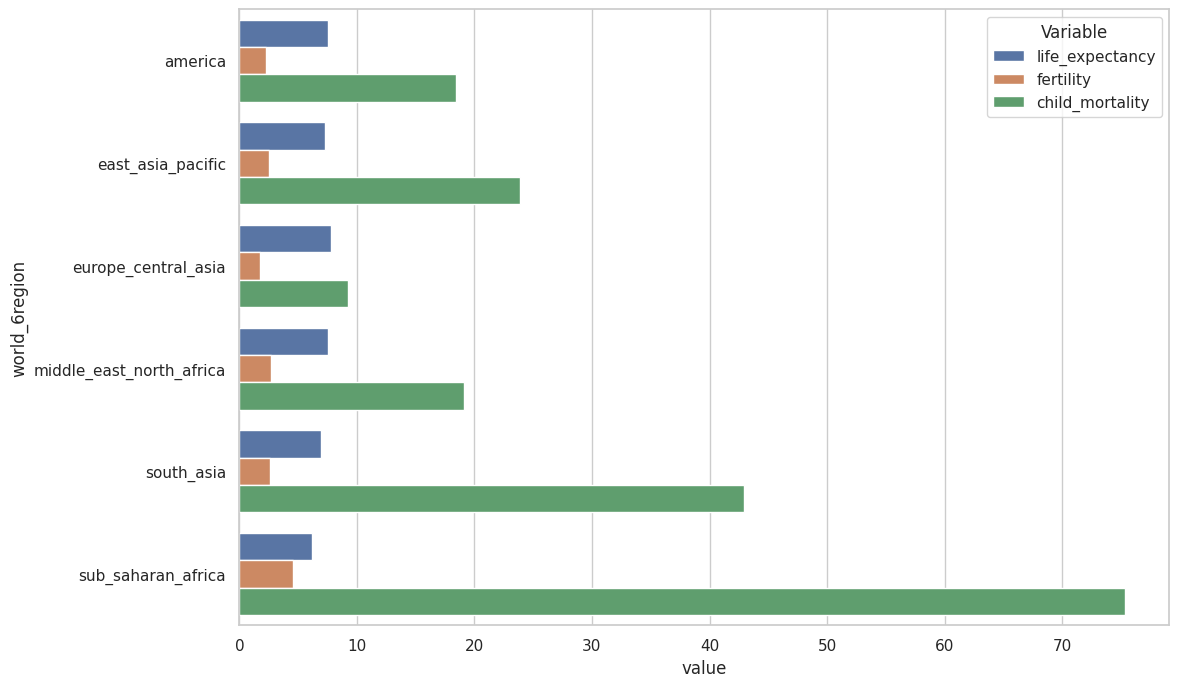

In [116]:
sns.barplot(x="value", y="world_6region", hue='Variable', data=region_dataset)

**Question 6.2:**

Re-create the plots from 4.1 as scatterplots using seaborn.

<Axes: xlabel='fertility', ylabel='child_mortality'>

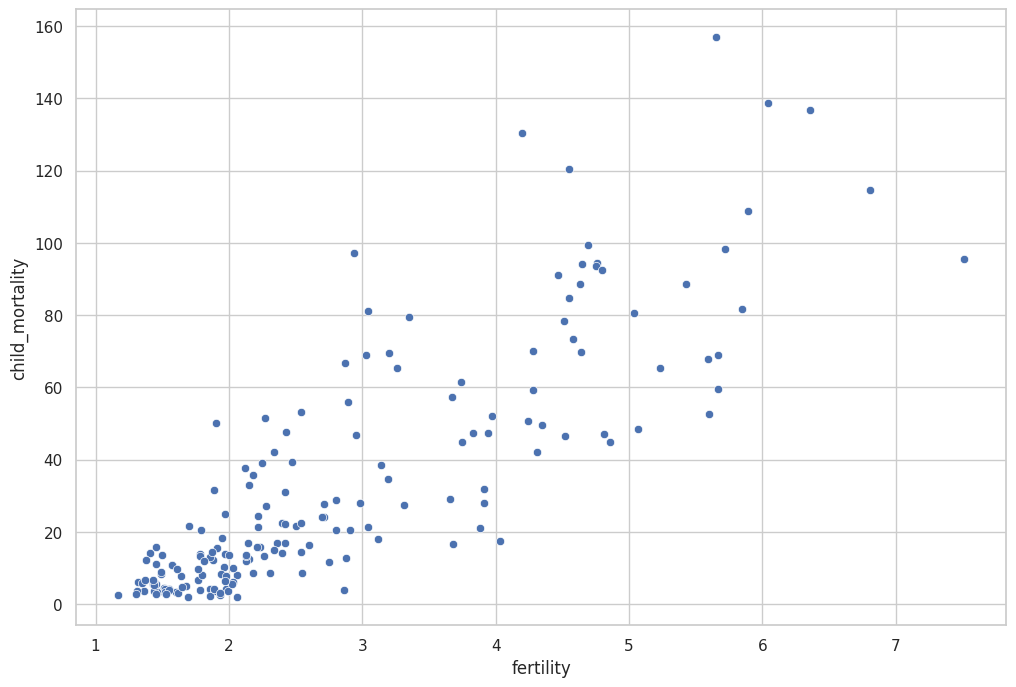

In [117]:
#Your Code here
sns.scatterplot(data=full_country_data_2015, x="fertility", y="child_mortality")

## 7. Submission
Done!  **To submit this lab**, please download your notebook as a .ipynb file and submit in Canvas under Lab 03.

